In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import os
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.chdir('Data2/')

# Pre-Look

In [3]:
df = pd.read_pickle('All_Data')

In [4]:
X = df[['Num_Beers','Num_Brewery_Ratings',
        'Num_Brewery_Reviews','Mean_Beer_Score',
        'Total_Beer_Reviews','Total_Beer_Ratings']]
y = df['Brewery_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [6]:
# Create an empty model
lr = LinearRegression()


# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(1 - (1-lr.score(X_train, y_train))*
      (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-lr.score(X_test, y_test))*
      (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.08558292258462008
0.09505581531983531
0.0840537970371028
0.091977773875345


In [7]:
predictions = lr.predict(X_test)

In [8]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.3166309570148685


In [9]:
y_test.std()

0.33293934762910266

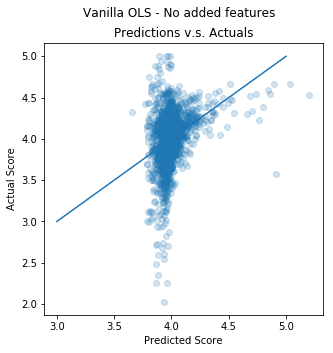

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([3,5],[3,5])

plt.xlabel('Predicted Score',)
plt.ylabel('Actual Score')

plt.suptitle('Vanilla OLS - No added features')
plt.title('Predictions v.s. Actuals')

plt.savefig('Pred_v_Act_Vanilla_OLS_No_Added_Features')

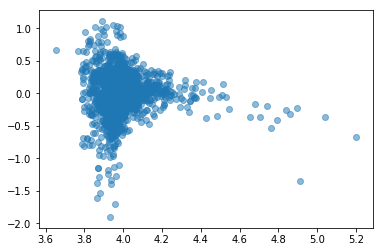

In [11]:
residuals = y_test - predictions
plt.scatter(predictions,residuals,alpha=0.5)


# First Look

In [12]:
df = pd.read_pickle('All_Data')

In [13]:
X = df[['Eatery', 'Num_Brewery_Ratings', 'Num_Brewery_Reviews', 
        'Total_Beer_Ratings', 'Total_Beer_Reviews', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score']]
y = df['Brewery_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

In [14]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [15]:
# Create an empty model
lr = LinearRegression()


# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(1 - (1-lr.score(X_train, y_train))*
      (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-lr.score(X_test, y_test))*
      (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.1455146356790511
0.14998795798554543
0.1433694841368227
0.14564377378444937


In [16]:
predictions = lr.predict(X_test)

In [17]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.30687041170734153


In [18]:
y_test.std()

0.33293934762910266

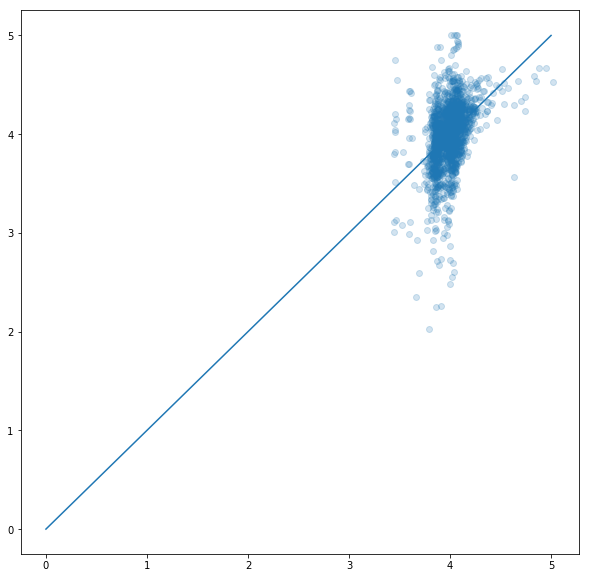

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([0,5],[0,5])

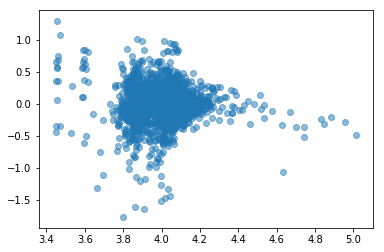

In [20]:
residuals = y_test - predictions
plt.scatter(predictions,residuals,alpha=0.5)


# Second Look - Feature Engineering

In [21]:
df = pd.read_pickle('All_Data')

In [22]:
df['Brew_Rats_Revs'] = df['Num_Brewery_Ratings'] * df['Num_Brewery_Reviews']
df['Beer_Rats_Revs'] = df['Total_Beer_Ratings'] * df['Total_Beer_Reviews']
df['Max_Times_Mean_Beer_Score'] = df['Max_Beer_Score'] * df['Max_Mean_Beer_Score'] * df['Mean_Beer_Score']

In [23]:
X = df[['Eatery', 'Num_Brewery_Ratings', 'Num_Brewery_Reviews', 
        'Total_Beer_Ratings', 'Total_Beer_Reviews', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Brew_Rats_Revs','Beer_Rats_Revs','Max_Times_Mean_Beer_Score']]
y = df['Brewery_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

In [24]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [25]:
# Create an empty model
lr = LinearRegression()


# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(1 - (1-lr.score(X_train, y_train))*
      (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-lr.score(X_test, y_test))*
      (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.20766910197604294
0.22041082591954797
0.20501472710829094
0.21508939811012517


In [26]:
predictions = lr.predict(X_test)

In [27]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.29388361718674033


In [28]:
y_test.std()

0.33293934762910266

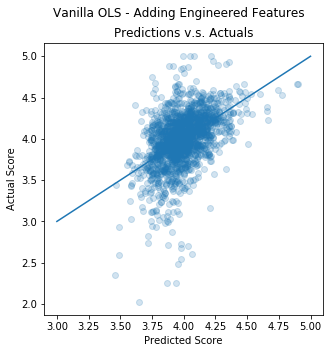

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([3,5],[3,5])

plt.xlabel('Predicted Score',)
plt.ylabel('Actual Score')

plt.suptitle('Vanilla OLS - Adding Engineered Features')
plt.title('Predictions v.s. Actuals')

plt.savefig('Pred_v_Act_Vanilla_OLS')

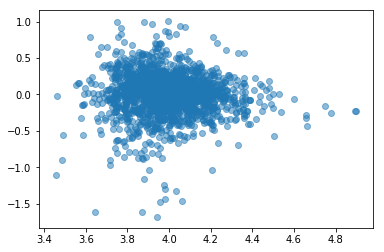

In [30]:
residuals = y_test - predictions
plt.scatter(predictions,residuals,alpha=0.5)

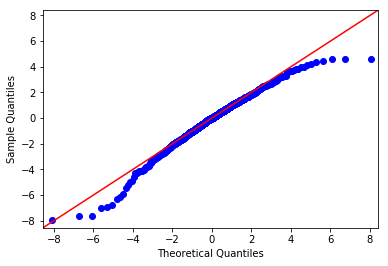

In [31]:
fig = sm.qqplot(residuals, stats.t, fit=True, line='45')
plt.show()

# Third Look - Removing Outliers

In [32]:
df = pd.read_pickle('All_Data')

In [33]:
df['Max_Beer_Score'] = df.Max_Beer_Score.replace(0,np.nan)
df['Mean_Beer_Score'] = df.Mean_Beer_Score.replace(0,np.nan)
df['Num_Beers'] = df.Num_Beers.replace(0,np.nan)
df['Total_Beer_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Total_Beer_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)
df['Num_Brewery_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Num_Brewery_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)

In [34]:
df.dropna(inplace=True)

In [35]:
df = df[df.Total_Beer_Reviews < 300]

In [36]:
df['Brew_Rats_Revs'] = df['Num_Brewery_Ratings'] * df['Num_Brewery_Reviews']
df['Beer_Rats_Revs'] = df['Total_Beer_Ratings'] * df['Total_Beer_Reviews']
df['Max_Times_Mean_Beer_Score'] = df['Max_Beer_Score'] * df['Max_Mean_Beer_Score'] * df['Mean_Beer_Score']

In [37]:
X = df[['Eatery', 'Num_Brewery_Ratings', 'Num_Brewery_Reviews', 
        'Total_Beer_Ratings', 'Total_Beer_Reviews', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Brew_Rats_Revs','Beer_Rats_Revs','Max_Times_Mean_Beer_Score']]
y = df['Brewery_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

In [38]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [39]:
# Create an empty model
lr = LinearRegression()


# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(1 - (1-lr.score(X_train, y_train))*
      (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-lr.score(X_test, y_test))*
      (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.2132451492357781
0.22023718336026388
0.20978054071865126
0.2132385642131609


In [40]:
predictions = lr.predict(X_test)

In [41]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.28739008418651946


In [42]:
y_test.std()

0.32557528403420083

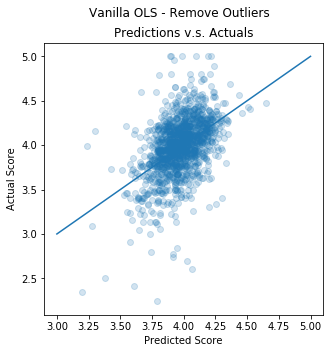

In [43]:
plt.figure(figsize=(5,5))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([3,5],[3,5])

plt.xlabel('Predicted Score',)
plt.ylabel('Actual Score')

plt.suptitle('Vanilla OLS - Remove Outliers')
plt.title('Predictions v.s. Actuals')

plt.savefig('Pred_v_Act_Vanilla_OLS_Rem_Outliers');

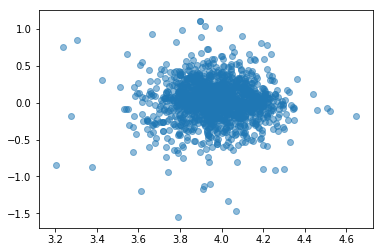

In [44]:
residuals = y_test - predictions
plt.scatter(predictions,residuals,alpha=0.5);

# Fourth Look - Logs?

In [45]:
df = pd.read_pickle('All_Data')

In [46]:
df['Max_Beer_Score'] = df.Max_Beer_Score.replace(0,np.nan)
df['Mean_Beer_Score'] = df.Mean_Beer_Score.replace(0,np.nan)
df['Num_Beers'] = df.Num_Beers.replace(0,np.nan)
df['Total_Beer_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Total_Beer_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)
df['Num_Brewery_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Num_Brewery_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)

In [47]:
df.dropna(inplace=True)

In [48]:
df = df[df.Total_Beer_Reviews < 300]

In [49]:
df['Log_Total_Beer_Ratings'] = np.log(df.Total_Beer_Ratings)
df['Log_Total_Beer_Reviews'] = np.log(df.Total_Beer_Reviews)
df['Log_Num_Brewery_Ratings'] = np.log(df.Num_Brewery_Ratings)
df['Log_Num_Brewery_Ratings'] = np.log(df.Num_Brewery_Ratings)

df['Wild_Sour'] = df.Mean_Wild_Sour * df.Max_Wild_Sour
df['Brew_Rats_Revs'] = df['Num_Brewery_Ratings'] * df['Num_Brewery_Reviews']
df['Beer_Rats_Revs'] = df['Total_Beer_Ratings'] * df['Total_Beer_Reviews']
df['Max_Times_Mean_Beer_Score'] = df['Max_Beer_Score'] * df['Max_Mean_Beer_Score'] * df['Mean_Beer_Score']

In [50]:
X = df[['Eatery', 'Log_Total_Beer_Ratings', 'Log_Total_Beer_Reviews', 
        'Log_Num_Brewery_Ratings', 'Log_Num_Brewery_Ratings', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Brew_Rats_Revs','Beer_Rats_Revs','Max_Times_Mean_Beer_Score',
        'Count_IPA_Pale_Ale','Wild_Sour']]
y = df['Brewery_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

In [51]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [52]:
# Create an empty model
lr = LinearRegression()


# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(1 - (1-lr.score(X_train, y_train))*
      (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-lr.score(X_test, y_test))*
      (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.21925801562489622
0.22169748277991885
0.21524391801885456
0.21353550881656225


In [53]:
predictions = lr.predict(X_test)

In [54]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.28712085344413046


In [55]:
y_test.std()

0.32557528403420083

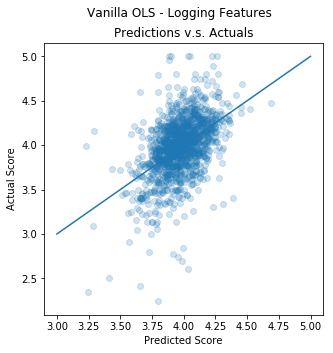

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([3,5],[3,5])

plt.xlabel('Predicted Score',)
plt.ylabel('Actual Score')

plt.suptitle('Vanilla OLS - Logging Features')
plt.title('Predictions v.s. Actuals')

plt.savefig('Pred_v_Act_Vanilla_OLS_Logs')

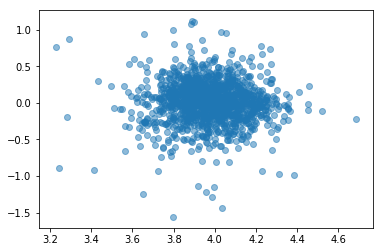

In [57]:
residuals = y_test - predictions
plt.scatter(predictions,residuals,alpha=0.5)


# Fifth Look - Box-cox

In [58]:
df = pd.read_pickle('All_Data')

In [59]:
df['Max_Beer_Score'] = df.Max_Beer_Score.replace(0,np.nan)
df['Mean_Beer_Score'] = df.Mean_Beer_Score.replace(0,np.nan)
df['Num_Beers'] = df.Num_Beers.replace(0,np.nan)
df['Total_Beer_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Total_Beer_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)
df['Num_Brewery_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Num_Brewery_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)

In [60]:
df.dropna(inplace=True)

In [61]:
df = df[df.Total_Beer_Reviews < 300]

In [62]:
lamb1=stats.boxcox_normmax(df.Total_Beer_Ratings, brack=(-1.9, 1.9)) 
lamb2=stats.boxcox_normmax(df.Total_Beer_Reviews, brack=(-1.9, 1.9))
lamb3=stats.boxcox_normmax(df.Num_Brewery_Ratings, brack=(-1.9, 1.9))
lamb4=stats.boxcox_normmax(df.Num_Brewery_Reviews, brack=(-1.9, 1.9))

In [63]:
df['Lam_Total_Beer_Ratings'] = (np.power(df.Total_Beer_Ratings,lamb1)-1)/lamb1
df['Lam_Total_Beer_Reviews'] = (np.power(df.Total_Beer_Reviews,lamb2)-1)/lamb2
df['Lam_Num_Brewery_Ratings'] = (np.power(df.Num_Brewery_Ratings,lamb3)-1)/lamb3
df['Lam_Num_Brewery_Reviews'] = (np.power(df.Num_Brewery_Reviews,lamb4)-1)/lamb4

df['Wild_Sour'] = df.Mean_Wild_Sour * df.Max_Wild_Sour
df['Lam_Brew_Rats_Revs'] = df['Lam_Num_Brewery_Ratings'] * df['Lam_Num_Brewery_Reviews']
df['Lam_Beer_Rats_Revs'] = df['Lam_Total_Beer_Ratings'] * df['Lam_Total_Beer_Reviews']
df['Max_Times_Mean_Beer_Score'] = df['Max_Beer_Score'] * df['Max_Mean_Beer_Score'] * df['Mean_Beer_Score']

In [64]:
X = df[['Eatery', 'Lam_Total_Beer_Ratings', 'Lam_Total_Beer_Reviews', 
        'Lam_Num_Brewery_Ratings', 'Lam_Num_Brewery_Ratings', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Lam_Brew_Rats_Revs','Lam_Beer_Rats_Revs',
        'Max_Times_Mean_Beer_Score','Count_IPA_Pale_Ale','Wild_Sour']]
y = df['Brewery_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

In [65]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [66]:
# Create an empty model
lr = LinearRegression()


# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(1 - (1-lr.score(X_train, y_train))*
      (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-lr.score(X_test, y_test))*
      (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.22078337267994574
0.2210834813497431
0.21677711752662931
0.21291506842007746


In [67]:
predictions = lr.predict(X_test)

In [68]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.287234085674032


In [69]:
y_test.std()

0.32557528403420083

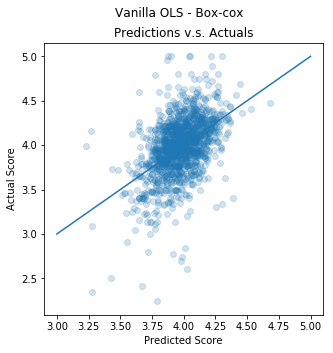

In [70]:
plt.figure(figsize=(5,5))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([3,5],[3,5])

plt.xlabel('Predicted Score',)
plt.ylabel('Actual Score')

plt.suptitle('Vanilla OLS - Box-cox')
plt.title('Predictions v.s. Actuals')

plt.savefig('Pred_v_Act_Vanilla_OLS_Box_cox')

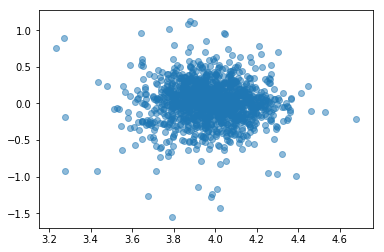

In [71]:
residuals = y_test - predictions
plt.scatter(predictions,residuals,alpha=0.5)


In [72]:
pd.to_pickle(df,'Cleaned_Modeled_Data')

# LASSO - Experimentation

In [73]:
df = pd.read_pickle('All_Data')

In [74]:
df['Max_Beer_Score'] = df.Max_Beer_Score.replace(0,np.nan)
df['Mean_Beer_Score'] = df.Mean_Beer_Score.replace(0,np.nan)
df['Num_Beers'] = df.Num_Beers.replace(0,np.nan)
df['Total_Beer_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Total_Beer_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)
df['Num_Brewery_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Num_Brewery_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)

In [75]:
df.dropna(inplace=True)

In [76]:
df = df[df.Total_Beer_Reviews < 300]

In [77]:
lamb1=stats.boxcox_normmax(df.Total_Beer_Ratings, brack=(-1.9, 1.9)) 
lamb2=stats.boxcox_normmax(df.Total_Beer_Reviews, brack=(-1.9, 1.9))
lamb3=stats.boxcox_normmax(df.Num_Brewery_Ratings, brack=(-1.9, 1.9))
lamb4=stats.boxcox_normmax(df.Num_Brewery_Reviews, brack=(-1.9, 1.9))

In [78]:
df['Lam_Total_Beer_Ratings'] = (np.power(df.Total_Beer_Ratings,lamb1)-1)/lamb1
df['Lam_Total_Beer_Reviews'] = (np.power(df.Total_Beer_Reviews,lamb2)-1)/lamb2
df['Lam_Num_Brewery_Ratings'] = (np.power(df.Num_Brewery_Ratings,lamb3)-1)/lamb3
df['Lam_Num_Brewery_Reviews'] = (np.power(df.Num_Brewery_Reviews,lamb4)-1)/lamb4

df['Wild_Sour'] = df.Mean_Wild_Sour * df.Max_Wild_Sour
df['Lam_Brew_Rats_Revs'] = df['Lam_Num_Brewery_Ratings'] * df['Lam_Num_Brewery_Reviews']
df['Lam_Beer_Rats_Revs'] = df['Lam_Total_Beer_Ratings'] * df['Lam_Total_Beer_Reviews']
df['Max_Times_Mean_Beer_Score'] = df['Max_Beer_Score'] * df['Max_Mean_Beer_Score'] * df['Mean_Beer_Score']

In [79]:
X = df[['Eatery', 'Lam_Total_Beer_Ratings', 'Lam_Total_Beer_Reviews', 
        'Lam_Num_Brewery_Ratings', 'Lam_Num_Brewery_Ratings', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Lam_Brew_Rats_Revs','Lam_Beer_Rats_Revs',
        'Max_Times_Mean_Beer_Score','Count_IPA_Pale_Ale','Wild_Sour']]
y = df['Brewery_Score']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [80]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_val = scaler.fit_transform(X_val.values)
X_test = scaler.transform(X_test.values)

In [81]:
lasso_model = Lasso(alpha = .00044, max_iter = 60)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.00044, copy_X=True, fit_intercept=True, max_iter=60,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
list(zip(list(X.columns), lasso_model.coef_))

[('Eatery', -0.05619690450642595),
 ('Lam_Total_Beer_Ratings', -0.07252779783801558),
 ('Lam_Total_Beer_Reviews', -0.055860207993866574),
 ('Lam_Num_Brewery_Ratings', 0.006196654178692287),
 ('Lam_Num_Brewery_Ratings', 1.3583479094108768e-18),
 ('Num_Beers', 0.023431197088080818),
 ('Max_Beer_Score', 0.08747277539543269),
 ('Max_Mean_Beer_Score', 0.03885291314032677),
 ('Mean_Beer_Score', 0.01930481033288763),
 ('Lam_Brew_Rats_Revs', 0.0820887801797685),
 ('Lam_Beer_Rats_Revs', 3.712817619056395e-18),
 ('Max_Times_Mean_Beer_Score', 0.0005784424657490673),
 ('Count_IPA_Pale_Ale', 0.008776572851460081),
 ('Wild_Sour', 0.01991777579112055)]

In [83]:
lm_train = lasso_model.score(X_train,y_train)
lm_val = lasso_model.score(X_val,y_val)

# Print out the R^2 for the model against the full dataset
print(lm_train)
print(lm_val)
print(1 - (1-lm_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-lm_val)*(len(y_val)-1)/(len(y_val)-X_test.shape[1]-1))

0.22027621703670552
0.20918049601005784
0.21579688467663727
0.1953928583315283


In [84]:
predictions = lasso_model.predict(X_test)

In [85]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.2993352139648233


In [86]:
y_test.std()

0.33829027451012084

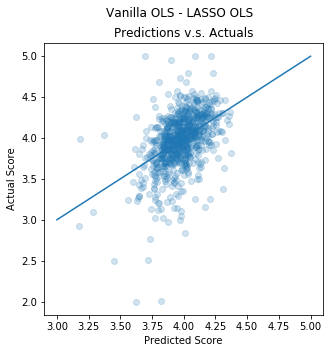

In [87]:
plt.figure(figsize=(5,5))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([3,5],[3,5])

plt.xlabel('Predicted Score',)
plt.ylabel('Actual Score')

plt.suptitle('Vanilla OLS - LASSO OLS')
plt.title('Predictions v.s. Actuals')

plt.savefig('Pred_v_Act_LASSO_OLS')

# Using LASSO Features

In [88]:
df = pd.read_pickle('All_Data')

In [89]:
df['Max_Beer_Score'] = df.Max_Beer_Score.replace(0,np.nan)
df['Mean_Beer_Score'] = df.Mean_Beer_Score.replace(0,np.nan)
df['Num_Beers'] = df.Num_Beers.replace(0,np.nan)
df['Total_Beer_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Total_Beer_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)
df['Num_Brewery_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Num_Brewery_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)

In [90]:
df.dropna(inplace=True)

In [91]:
df = df[df.Total_Beer_Reviews < 300]

In [92]:
lamb1=stats.boxcox_normmax(df.Total_Beer_Ratings, brack=(-1.9, 1.9)) 
lamb2=stats.boxcox_normmax(df.Total_Beer_Reviews, brack=(-1.9, 1.9))
lamb3=stats.boxcox_normmax(df.Num_Brewery_Ratings, brack=(-1.9, 1.9))
lamb4=stats.boxcox_normmax(df.Num_Brewery_Reviews, brack=(-1.9, 1.9))

In [93]:
df['Lam_Total_Beer_Ratings'] = (np.power(df.Total_Beer_Ratings,lamb1)-1)/lamb1
df['Lam_Total_Beer_Reviews'] = (np.power(df.Total_Beer_Reviews,lamb2)-1)/lamb2
df['Lam_Num_Brewery_Ratings'] = (np.power(df.Num_Brewery_Ratings,lamb3)-1)/lamb3
df['Lam_Num_Brewery_Reviews'] = (np.power(df.Num_Brewery_Reviews,lamb4)-1)/lamb4

df['Wild_Sour'] = df.Mean_Wild_Sour * df.Max_Wild_Sour
df['Lam_Brew_Rats_Revs'] = df['Lam_Num_Brewery_Ratings'] * df['Lam_Num_Brewery_Reviews']
df['Lam_Beer_Rats_Revs'] = df['Lam_Total_Beer_Ratings'] * df['Lam_Total_Beer_Reviews']
df['Max_Times_Mean_Beer_Score'] = df['Max_Beer_Score'] * df['Max_Mean_Beer_Score'] * df['Mean_Beer_Score']

In [94]:
X = df[['Num_Beers','Eatery','Max_IPA',
        'Max_Wild_Sour','ABV_std',
        'Max_Beer_Score','Max_Mean_Beer_Score',
        'Beer_to_go','Count_IPA_Pale_Ale','Max_Specialty',
        'Min_Stout','Mean_ABV']]
y = df['Brewery_Score']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [95]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_val = scaler.fit_transform(X_val.values)
X_test = scaler.transform(X_test.values)

In [96]:
# Create an empty model
lr = LinearRegression()


# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(1 - (1-lr.score(X_train, y_train))*
      (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-lr.score(X_test, y_test))*
      (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.23260785531986528
0.21431380547608425
0.2288322482119679
0.20260171313535502


In [97]:
predictions = lr.predict(X_test)

In [98]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.29967357575186176


In [99]:
y_test.std()

0.33829027451012084

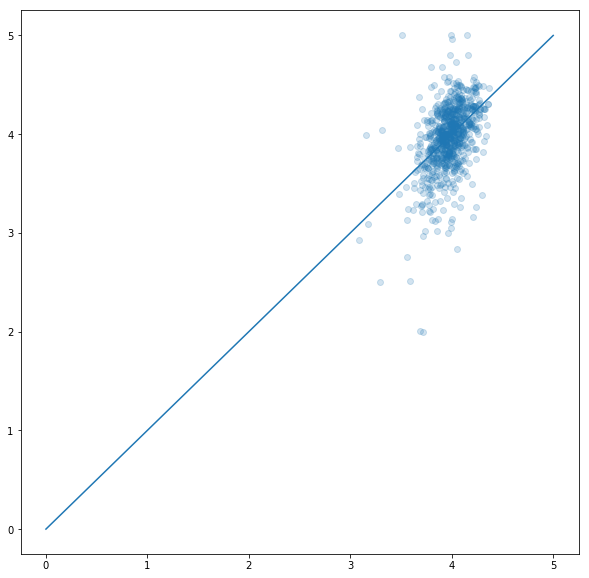

In [100]:
plt.figure(figsize=(10,10))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([0,5],[0,5])

# Ridge

In [101]:
df = pd.read_pickle('All_Data')

In [102]:
df['Max_Beer_Score'] = df.Max_Beer_Score.replace(0,np.nan)
df['Mean_Beer_Score'] = df.Mean_Beer_Score.replace(0,np.nan)
df['Num_Beers'] = df.Num_Beers.replace(0,np.nan)
df['Total_Beer_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Total_Beer_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)
df['Num_Brewery_Reviews'] = df.Total_Beer_Reviews.replace(0,np.nan)
df['Num_Brewery_Ratings'] = df.Total_Beer_Ratings.replace(0,np.nan)

In [103]:
df.dropna(inplace=True)

In [104]:
df = df[df.Total_Beer_Reviews < 300]

In [105]:
lamb1=stats.boxcox_normmax(df.Total_Beer_Ratings, brack=(-1.9, 1.9)) 
lamb2=stats.boxcox_normmax(df.Total_Beer_Reviews, brack=(-1.9, 1.9))
lamb3=stats.boxcox_normmax(df.Num_Brewery_Ratings, brack=(-1.9, 1.9))
lamb4=stats.boxcox_normmax(df.Num_Brewery_Reviews, brack=(-1.9, 1.9))

In [106]:
df['Lam_Total_Beer_Ratings'] = (np.power(df.Total_Beer_Ratings,lamb1)-1)/lamb1
df['Lam_Total_Beer_Reviews'] = (np.power(df.Total_Beer_Reviews,lamb2)-1)/lamb2
df['Lam_Num_Brewery_Ratings'] = (np.power(df.Num_Brewery_Ratings,lamb3)-1)/lamb3
df['Lam_Num_Brewery_Reviews'] = (np.power(df.Num_Brewery_Reviews,lamb4)-1)/lamb4

df['Wild_Sour'] = df.Mean_Wild_Sour * df.Max_Wild_Sour
df['Lam_Brew_Rats_Revs'] = df['Lam_Num_Brewery_Ratings'] * df['Lam_Num_Brewery_Reviews']
df['Lam_Beer_Rats_Revs'] = df['Lam_Total_Beer_Ratings'] * df['Lam_Total_Beer_Reviews']
df['Max_Times_Mean_Beer_Score'] = df['Max_Beer_Score'] * df['Max_Mean_Beer_Score'] * df['Mean_Beer_Score']

In [107]:
X = df[['Eatery', 'Lam_Total_Beer_Ratings', 'Lam_Total_Beer_Reviews', 
        'Lam_Num_Brewery_Ratings', 'Lam_Num_Brewery_Ratings', 
        'Num_Beers', 'Max_Beer_Score', 'Max_Mean_Beer_Score', 
        'Mean_Beer_Score','Lam_Brew_Rats_Revs','Lam_Beer_Rats_Revs',
        'Max_Times_Mean_Beer_Score','Count_IPA_Pale_Ale','Wild_Sour']]
y = df['Brewery_Score']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [108]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.values)
X_val = scaler.fit_transform(X_val.values)
X_test = scaler.transform(X_test.values)

In [109]:
lr_model_ridge = Ridge(alpha = 10000)
lr_model_ridge.fit(X_train, y_train)

list(zip(X.columns, lr_model_ridge.coef_))

[('Eatery', -0.013304134258782317),
 ('Lam_Total_Beer_Ratings', 0.0009607164236875006),
 ('Lam_Total_Beer_Reviews', -0.0010047049266187227),
 ('Lam_Num_Brewery_Ratings', 0.0009607164236874984),
 ('Lam_Num_Brewery_Ratings', 0.0009607164236874992),
 ('Num_Beers', 0.008058632527302304),
 ('Max_Beer_Score', 0.020284548082338535),
 ('Max_Mean_Beer_Score', 0.01717630131034674),
 ('Mean_Beer_Score', 0.0024810876427367144),
 ('Lam_Brew_Rats_Revs', 0.0008583874892797834),
 ('Lam_Beer_Rats_Revs', 0.0008583874892797835),
 ('Max_Times_Mean_Beer_Score', 0.011385020325842161),
 ('Count_IPA_Pale_Ale', 0.007592928933561581),
 ('Wild_Sour', 0.008327317168586949)]

In [110]:
ridge_train = lr_model_ridge.score(X_train,y_train)
ridge_val = lr_model_ridge.score(X_val,y_val)

print(ridge_train)
print(ridge_val)
print(1 - (1-ridge_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(1 - (1-ridge_val)*(len(y_val)-1)/(len(y_val)-X_test.shape[1]-1))

0.12533175475035307
0.13027672751370267
0.1203069884666047
0.11511343260111473


In [111]:
predictions = lr_model_ridge.predict(X_test)

In [112]:
print(sqrt(mean_squared_error(y_test, predictions)))

0.3153892719762603


In [113]:
y_test.std()

0.33829027451012084

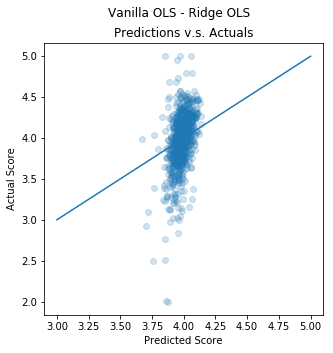

In [114]:
plt.figure(figsize=(5,5))
plt.scatter(predictions,y_test,alpha=.2)
plt.plot([3,5],[3,5])

plt.xlabel('Predicted Score',)
plt.ylabel('Actual Score')

plt.suptitle('Vanilla OLS - Ridge OLS')
plt.title('Predictions v.s. Actuals')

plt.savefig('Pred_v_Act_Ridge_OLS')